<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/Magnetno_polje_v_osi_tuljave_induktivnost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Izračun polja v osi tuljave

R je polmer tuljave
NI je N*I
l je dolžina tuljave (z2-z1)

Formula za izračun polja v osi tuljave je:

$$ {B_z} =\frac{{{\mu _0}NI}}{{2l}}\left( {\frac{{{z_2} - z}}{{\sqrt {{{\left( {z - {z_2}} \right)}^2} + {R^2}} }} - \frac{{({z_1} - z)}}{{\sqrt {{{\left( {z - {z_1}} \right)}^2} + {R^2}} }}} \right)$$


In [0]:
from IPython.display import Image
from IPython.core.display import HTML 

In [0]:
Image(url= "https://raw.githubusercontent.com/osnove/Slike/master/oe2_solenoid.png")

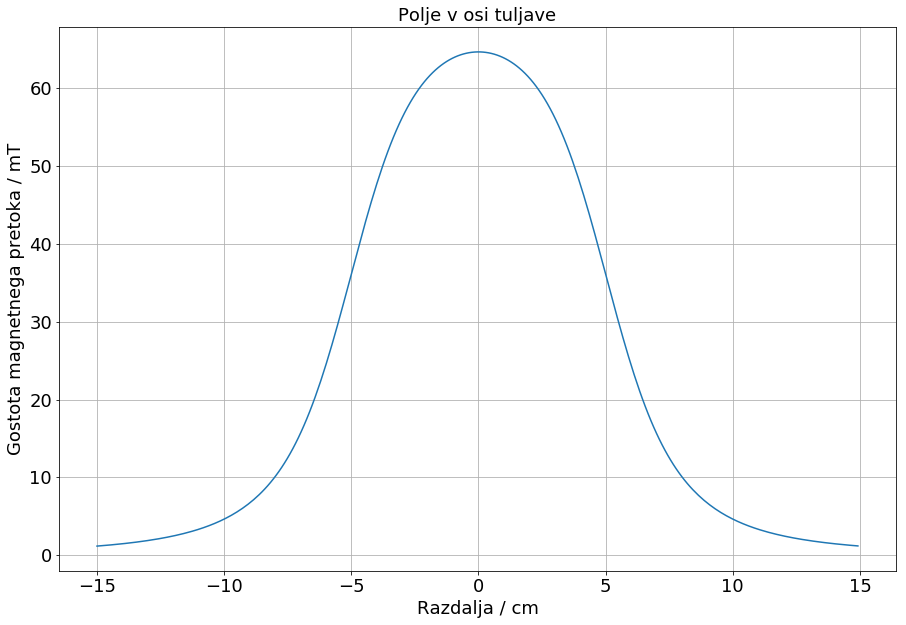

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib

NI=6000   # tok
R=3e-2     # polmer
mi0=4*np.pi*1e-7  # permeabilnost
z1=-5e-2
z2=5e-2
l=z2-z1    # dolžina

z=np.arange(-15,15,0.11)*1e-2

B=mi0*NI/(2*l)*((z2-z)/np.sqrt((z-z2)**2+R**2)-(z1-z)/np.sqrt((z-z1)**2+R**2))
plt.figure(figsize=(15,10))
plt.title('Polje v osi tuljave',fontsize=18)
plt.xlabel('Razdalja / cm',fontsize=18)
plt.ylabel('Gostota magnetnega pretoka / mT',fontsize=18)
plt.tick_params(labelsize=18)

plt.plot(z*1e2,B*1e3)
plt.grid()
plt.show()


## Izračun induktivnosti 
po http://info.ee.surrey.ac.uk/Workshop/advice/coils/air_coils.html


In [0]:
Image(url= "https://raw.githubusercontent.com/osnove/Slike/master/mult_layer_air_coil.png")


In [0]:
Image(url= "https://raw.githubusercontent.com/osnove/Slike/master/Brooks_ratio.png")

## Izračun za Brooksovo tuljavo z maximalnim L za c=b

In [0]:
d= 0.05  # premer tuljave
c=0.07  # debelina (višina) ovojev
b=c   # dolžina tuljave
d_zice=1.8e-3
I=10 # Tok v žici


#nl=50 # Number of layers (debelina žice * nl = c)
nl=round(c/d_zice)
nw=nl # število ovojev vzdolž tuljave
N=nl*nw
print('Število plasti (layerjev) = ', nl)
print('Število ovojev) = ', N)
### korekcijski faktor zaradi okrogle žice

#kf=(np.pi*(d_zice/2)**2)/d_zice**2=(1-np.pi/4)
#kf=np.pi/4
kf=1
NI=N*I # A-ovoji
Il=kf*NI/nl  # tok v enem layerju

#N=1200    # število ovojev


# Dolžina žice
l_zice=0

a=(d+c)/2 # srednji polmer v m
S1 = (c/(2*a))**2 


L = 4E-7*np.pi*a*N**2*((0.5+S1/12)*np.log(8/S1) - 0.84834+0.2041*S1)
print('Induktivnost = ',L*1e3, ' mH')

Ball=0
z1=-b/2
z2=b/2

def B2(r,z):
	# This function returns B for specific radius and position z 
  B2=mi0*Il/(2*l)*((z2-z)/np.sqrt((z-z2)**2+r**2)-(z1-z)/np.sqrt((z-z1)**2+r**2))
  return B2
 
for i in range(1,nl):
  r=(d/2)+i/nl*c
  l_zice=nw*(2*np.pi*r)+l_zice
  Bl=B2(r,0)
  Ball=Ball+Bl 
  #print(Bl)

print("Polje v sredini je ",Ball*1e3, "mT")
print("dolžina žice = ",l_zice, "m")

# Upornost žice
ro_Cu=1.72e-8  # Ohm*m
R_Cu=ro_Cu*l_zice/(np.pi*(d_zice/2)**2)
print("Upornost žice = ",R_Cu, "Ohm")

# Teža
gostota_Cu=8.79e3 #kg/m3
#masa=gostota_Cu*l_zice*(np.pi*(d_zice/2)**2)
masa=gostota_Cu*np.pi*((d/2+c)**2-(d/2)**2)*c
print("Masa žice = ",masa, "kg")


Število plasti (layerjev) =  39
Število ovojev) =  1521
Induktivnost =  155.130776162855  mH
Polje v sredini je  98.43445235838281 mT
dolžina žice =  558.7008375144089 m
Upornost žice =  3.7763555555555564 Ohm
Masa žice =  16.23738446193192 kg


## Izračun polja s sumacijo po višini

In [0]:
d= 0.05  # premer tuljave
c=0.04  # debelina (višina) ovojev
b=0.07   # dolžina tuljave
d_zice=1.88e-3
I=10 # Tok v žici

def B2(r,z):
	# This function returns B for specific radius and position z 
  B2=mi0*Il/(2*l)*((z2-z)/np.sqrt((z-z2)**2+r**2)-(z1-z)/np.sqrt((z-z1)**2+r**2))
  return B2
 
Bb=[]
LL=[]
for b1 in range(1,11):
  b=b1*1e-2
  print(b)
  z1=-b/2
  z2=b/2
  #nl=50 # Number of layers (debelina žice * nl = c)
  nl=round(c/d_zice)
  nw=round(b/d_zice) # število ovojev vzdolž tuljave
  N=nl*nw  # število vseh ovojev
  print('Število plasti (layerjev) = ', nl)
  print('Število ovojev) = ', N)
  ### korekcijski faktor zaradi okrogle žice
  #kf=(np.pi*(d_zice/2)**2)/d_zice**2=(1-np.pi/4)
  #kf=np.pi/4
  kf=1
  NI=N*I # A-ovoji
  Il=kf*NI/nl  # tok v enem layerju
  Il=I*(c*b)/d_zice**2/nl  # korigiran tok zaradi zaokroževanja 
  # Dolžina žice
  l_zice=0

  Ball=0
  for i in range(0,nl):
    r=(d/2)+i/(nl-1)*c
    l_zice=nw*(2*np.pi*r)+l_zice
    Bl=B2(r,0)
    Ball=Ball+Bl 
    #print(Bl)

  Bb=np.concatenate((Bb,[Ball*1e3]))
  print(Bb)

  # Izračun induktivnosti po Brooksu
  a=(d+c)/2 # srednji polmer v m
  S1 = (c/(2*a))**2 
  L = 4E-7*np.pi*a*N**2*((0.5+S1/12)*np.log(8/S1) - 0.84834+0.2041*S1)
  print('Induktivnost = ',L*1e3, ' mH')
  
  # Whellerjeva formula za poljubno dolžino, spremeni inče 1 in = 2.54 cm
  L=0.8*(a)**2*N**2*4E-7/(6*a+9*b+10*c)/2.54e-2  # v uH
  print('Induktivnost po Wheeler= ',L*1e3, ' mH')
  LL=np.concatenate((LL,[L*1e3]))


  print("Polje v sredini je ",Ball*1e3, "mT")
  print("dolžina žice = ",l_zice, "m")





  # Upornost žice
  ro_Cu=1.72e-8  # Ohm*m
  R_Cu=ro_Cu*l_zice/(np.pi*(d_zice/2)**2)
  print("Upornost žice = ",R_Cu, "Ohm")

  # Teža
  gostota_Cu=8.79e3 #kg/m3
  masa_okrogle=gostota_Cu*l_zice*(np.pi*(d_zice/2)**2)
  masa_polne=gostota_Cu*np.pi*((d/2+c)**2-(d/2)**2)*b
  print("Masa okrogle žice = ",masa_okrogle, "kg")
  print("Masa polne žice = ",masa_polne, "kg")


0.01
Število plasti (layerjev) =  21
Število ovojev) =  105
[1.69666105]
Induktivnost =  0.6880095927556684  mH
Induktivnost po Wheeler=  0.3700891007045171  mH
Polje v sredini je  1.6966610537408773 mT
dolžina žice =  29.68805057642355 m
Upornost žice =  0.18395201448619286 Ohm
Masa okrogle žice =  0.7243961545010088 kg
Masa polne žice =  0.9941255793019543 kg
0.02
Število plasti (layerjev) =  21
Število ovojev) =  231
[1.69666105 6.61163328]
Induktivnost =  3.3299664289374347  mH
Induktivnost po Wheeler=  1.601571468272348  mH
Polje v sredini je  6.611633275862268 mT
dolžina žice =  65.31371126813181 m
Upornost žice =  0.40469443186962434 Ohm
Masa okrogle žice =  1.5936715399022194 kg
Masa polne žice =  1.9882511586039087 kg
0.03
Število plasti (layerjev) =  21
Število ovojev) =  336
[ 1.69666105  6.61163328 14.29742879]
Induktivnost =  7.045218229818044  mH
Induktivnost po Wheeler=  3.0640227843859935  mH
Polje v sredini je  14.297428786373418 mT
dolžina žice =  95.00176184455536 m


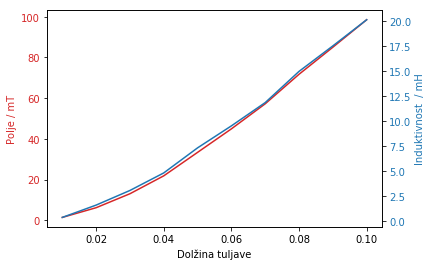

In [0]:
b=np.linspace(1,10,10)*1e-2
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Dolžina tuljave')
ax1.set_ylabel('Polje / mT', color=color)
ax1.plot(b, Bb, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota

color = 'tab:blue'
ax2.set_ylabel('Induktivnost  / mH', color=color)  
ax2.plot(b, LL, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()